<a href="https://colab.research.google.com/github/MisterGusMan/IGTI_Bootcamp_ML/blob/main/Desafio_do_M%C3%B3dulo_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook será utilizado para responder as questões do **Desafio do Módulo 1**.

Para a implementação dos algoritmos,utilize as definições abaixo:



```
Algoritmo KNN:clf_KNN=KNeighborsClassifier(n_neighbors=5)

Algoritmo Árvore de Decisão:clf_arvore=DecisionTreeClassifier()

Algoritmo Floresta Randômica:clf_floresta=RandomForestClassifier(max_depth=10,random_state=1)

Algoritmo SVM:clf_svm=SVC(gamma='auto',kernel='rbf')

Algoritmo Rede MLP:clf_mlp=MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5,5),random_state=1)
```



Obs.: 

1.Quando  for  realizar  a  leitura  do  arquivo  “winequality-red.csv”  com  a  função pandas.read_csv(),é necessário utilizar o atributo “ sep=';' ” para que as colunas sejam reconhecidas. 

2.Para a divisão dos dados de treinamento e teste dos algoritmos,utilize o valor de “random_state=1” e a proporção de 70% para treinamentoe 30% para teste.

3.Utilize  a  normalização  dos  dados  utilizando  o  MinMaxScaler  para  todos  os algoritmos. 

4.Utilize a variável “quality” como saída e as demais como entrada do modelo.

5.Para  a  última  questão,  considere  a  realização  das  mesmas  etapas  desenvolvidas (MinMaxScaler, train_test_split etc.)

In [84]:
import pandas as pd

In [83]:
# Separador de valores é ';'
df_wine = pd.read_csv('winequality-red.csv', sep = ';')

In [ ]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [ ]:
df_wine.shape

(1599, 12)

# 2.  Quantos tipos diferentes de dados existem no dataset do desafio?


In [ ]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# 3. Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açúcar)?

In [ ]:
df_wine['residual sugar'].isnull().values.any()

False

# 4. Qual é o desvio padrão para a variável "fixed acidity"?

In [ ]:
df_wine['fixed acidity'].std()

1.7410963181277006

# 5.  Qual é a mediana para a variável "residual sugar"?

In [ ]:
df_wine['residual sugar'].median()

2.2

# 6. Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH", é CORRETO afirmar:

In [88]:
df_wine[['fixed acidity', 'pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


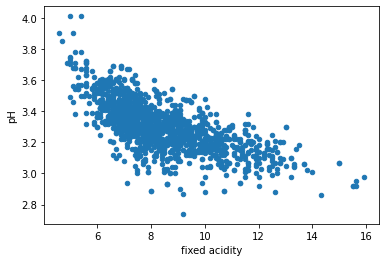

In [87]:
df_wine.plot(kind = 'scatter', x = 'fixed acidity', y = 'pH')

Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH". 

# 7. Sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol", mesmo sendo reduzido, é CORRETO dizer:

In [ ]:
df_wine[['quality', 'alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


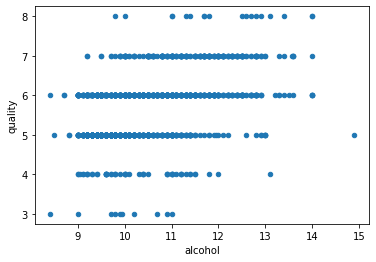

In [91]:
df_wine.plot(kind = 'scatter', x = 'alcohol', y = 'quality')

Não é possível dizer nada sobre a correlação entre as variáveis. 

# 8. Quantas instâncias existem para a qualidade do vinho igual a 5?

In [ ]:
len(df_wine[df_wine.quality == 5])

681

# 9. Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df_wine.drop('quality', axis = 1))
df_entrada = pd.DataFrame(data, columns = df_wine.drop('quality', axis = 1).columns)
df_entrada.min()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
dtype: float64

# 10. Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurácia para o KNN?

In [ ]:
from sklearn.model_selection import train_test_split
X = df_entrada
y = df_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors = 5)
clf_KNN.fit(X_train, y_train)
pred = clf_KNN.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.5645833333333333

# 11. Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste, como mostrado anteriormente, qual é o valor da acurácia?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_arvore.predict(X_test))

0.58125

# 12. Aplicando o algoritmo de floresta randômica com os mesmos parâmetros apresentados no enunciado e mesmos valores para o treinamento e teste, qual é o valor mais próximo para a acurácia?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta=RandomForestClassifier(max_depth=10,random_state=1)
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_floresta.predict(X_test))

0.6791666666666667

# 13. Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor mais próximo para a acurácia obtido?

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_svm.predict(X_test))

0.5854166666666667

# 14. Aplicando a rede MLP, como mostrado no enunciado, e com os mesmos dados de treinamento e teste utilizados, qual é o valor mais próximo para a acurácia do modelo?

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp=MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5,5),random_state=1)
clf_mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_mlp.predict(X_test))

0.6

# 15. Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual é o valor mais próximo da acurácia do modelo para esse novo dataset?

In [ ]:
df_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [76]:
for q in df_wine['quality']:
  if q > 5:
    df_wine.replace(q, 'Bom', inplace=True)
  else:
    df_wine.replace(q, 'Ruim', inplace=True)

In [78]:
df_wine.quality.value_counts()

Bom     855
Ruim    744
Name: quality, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
X = df_entrada
y = df_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [80]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta=RandomForestClassifier(max_depth=10,random_state=1)
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_floresta.predict(X_test))

0.8041666666666667